In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

### We downloaded an excell file contains benjamin netanyahu speeches and content thay from ynet source:
https://z.ynet.co.il/long/content/specials/inhiswords/
- Afetr that, we converted it to a .csv file in order to work with the pandas library

In [2]:
# xlsx to csv conversion 
# def convert_xlsx_to_csv(xlsx_file, csv_file):
#     df = pd.read_excel(xlsx_file)
#     df.to_csv(csv_file, index=False)

# convert_xlsx_to_csv('netanyahu___data.xlsx', 'bibi_data.csv')

In [3]:
bibi_df = pd.read_csv('bibi_data.csv')
bibi_df.head()

,תאריך,סוג,טקסט
0,7.10.2023,הצהרה,"אזרחי ישראל, אנחנו במלחמה. לא במבצע, לא בסבבים..."
1,7.10.2023,פתיחת ישיבת קבינט,מהבוקר מדינת ישראל נמצאת במלחמה. היעד הראשון ש...
2,2023-07-10 00:00:00,ישיבת קבינט והצהרה לציבור,"התקבלו החלטות מבצעיות שמטרתן להביא ל""השמדת היכ..."
3,2023-08-10 00:00:00,ציוץ,"""אנחנו יוצאים למלחמה ארוכה וקשה. המלחמה נכפתה ..."
4,8.10.2023,ציוץ,"""בחמ״ל חיל האוויר. ישראל תנצח""."


In [4]:
# replace column titles with english names
bibi_df.columns = ['date','type','text']

In [5]:
# filter to keep only the rows with 'נאום' contained in the type column
filtered_bibi_df = bibi_df[bibi_df['type'].str.contains('נאום', case=False, na=False)]
filtered_bibi_df

,date,type,text
16,12.10.2023,נאום בכנסת,"אדוני היו""ר, חברות וחברי הכנסת, השרות והשרים, ..."
20,16.10.2023,נאום בכנסת,"""מכובדי נשיא המדינה, יו""ר הכנסת, המשנה לנשיא ב..."
139,25.12.2023,נאום בכנסת,"משפחות יקרות, \nאדוני היו""ר,\nשרות ושרי הממשלה..."
172,24.1.2024,נאום בכנסת,"מכובדי נשיא המדינה יצחק הרצוג, יו""ר הכנסת אמיר..."
178,30.1.2024,נאום בישיבת עלי,"תודה הרב סדן, אתה מנהיג גדול לעם ישראל, והישיב..."
247,9.4.2024,נאום למתגייסים,אתם ביום מאוד גורלי בחיים שלכם ובחיים של המדינ...
252,16.4.2024,נאום למתגייסים,"דיברתי עם כמה מכם, ראיתי את המוכנות, גם הפיזית..."
265,2.5.2024,"נאום אצ""ל","אנחנו מתכנסים כאן, לא רק כדי להזכיר נשכחות מן ..."
274,5.5.2024,נאום ערב יום השואה,"מכובדי נשיא המדינה ורעייתו,\nאעשה כמצוותך, ואו..."
276,6.5.2024,נאום יום השואה בכנסת,"אמרתי אמש בטקס הזיכרון ביד ושם, שהכוונה של המר..."


In [6]:
# remove '\n' from the text column
filtered_bibi_df.loc[:, 'text'] = filtered_bibi_df['text'].str.replace('\n', ' ', regex=False)
filtered_bibi_df['text']

16     אדוני היו"ר, חברות וחברי הכנסת, השרות והשרים, ...
20     "מכובדי נשיא המדינה, יו"ר הכנסת, המשנה לנשיא ב...
139    משפחות יקרות,  אדוני היו"ר, שרות ושרי הממשלה, ...
172    מכובדי נשיא המדינה יצחק הרצוג, יו"ר הכנסת אמיר...
178    תודה הרב סדן, אתה מנהיג גדול לעם ישראל, והישיב...
247    אתם ביום מאוד גורלי בחיים שלכם ובחיים של המדינ...
252    דיברתי עם כמה מכם, ראיתי את המוכנות, גם הפיזית...
265    אנחנו מתכנסים כאן, לא רק כדי להזכיר נשכחות מן ...
274    מכובדי נשיא המדינה ורעייתו, אעשה כמצוותך, ואומ...
276    אמרתי אמש בטקס הזיכרון ביד ושם, שהכוונה של המר...
285    מכובדי נשיא המדינה, יצחק הרצוג ורעייתו; יושב-ר...
286    מכובדי נשיא המדינה, יצחק הרצוג, אעשה כמצוותך ו...
304    אדוני היו"ר, חברי הכנסת, לפני כמה ימים הייתי ב...
314    מכובדי הנשיא יצחק הרצוג ורעייתו מיכל, יושב-ראש...
334    החשיבות של המעמד הזה בכל שנה נשמרת, אבל השנה ה...
341    אדוני היו"ר, חברות וחברי הכנסת,  "תרימו את הרא...
361    שר הביטחון, יואב גלנט; הרמטכ"ל, רב-אלוף הרצי ה...
366    אחי ואחיותיי למשפחת השכו

In [ ]:
# load 500 common hebrew stopwords
with open('heb_stopwords.txt', 'r', encoding='utf-8') as f:
    heb_stopwords = f.read().splitlines()    
print(heb_stopwords)

['את', 'לא', 'של', 'אני', 'על', 'זה', 'עם', 'כל', 'הוא', 'אם', 'או', 'גם', 'יותר', 'יש', 'לי', 'מה', 'אבל', 'פורום', 'אז', 'טוב', 'רק', 'כי', 'שלי', 'היה', 'בפורום', 'אין', 'עוד', 'היא', 'אחד', 'ב', 'ל', 'עד', 'לך', 'כמו', 'להיות', 'אתה', 'כמה', 'אנחנו', 'הם', 'כבר', 'אנשים', 'אפשר', 'תודה', 'שלא', 'אותו', 'ה', 'מאוד', 'הרבה', 'ולא', 'ממש', 'לו', 'א', 'מי', 'חיים', 'בית', 'שאני', 'יכול', 'שהוא', 'כך', 'הזה', 'איך', 'היום', 'קצת', 'עכשיו', 'שם', 'בכל', 'יהיה', 'תמיד', 'י', 'שלך', 'הכי', 'ש', 'בו', 'לעשות', 'צריך', 'כן', 'פעם', 'לכם', 'ואני', 'משהו', 'אל', 'שלו', 'שיש', 'ו', 'וגם', 'אתכם', 'אחרי', 'בנושא', 'כדי', 'פשוט', 'לפני', 'שזה', 'אותי', 'אנו', 'למה', 'דבר', 'כ', 'כאן', 'אולי', 'טובים', 'רוצה', 'שנה', 'בעלי', 'החיים', 'למען', 'אתם', 'מ', 'בין', 'יום', 'זאת', 'איזה', 'ביותר', 'לה', 'אחת', 'הכל', 'הפורומים', 'לכל', 'אלא', 'פה', 'יודע', 'שלום', 'דקות', 'לנו', 'השנה', 'דרך', 'אדם', 'נראה', 'זו', 'היחידה', 'רוצים', 'בכלל', 'טובה', 'שלנו', 'האם', 'הייתי', 'הלב', 'היו', 'ח', 'שדרות', 'בלי

In [37]:
# create a hebrew tf-idf vectorizer
vectorizer = TfidfVectorizer(
    stop_words=heb_stopwords, 
)
X = vectorizer.fit_transform(filtered_bibi_df['text'])

In [41]:
feature_names = vectorizer.get_feature_names_out()
# convert the tf-idf matrix to an array and sum the scores for each word
tfidf_scores = X.sum(axis=0).A1 

tfidf_df = pd.DataFrame({
    'word': feature_names,
    'tfidf': tfidf_scores
}).sort_values(by='tfidf', ascending=False)

In [42]:
def reverse_hebrew_words(word_list):
    return {word[::-1]: score for word, score in word_list.items()}

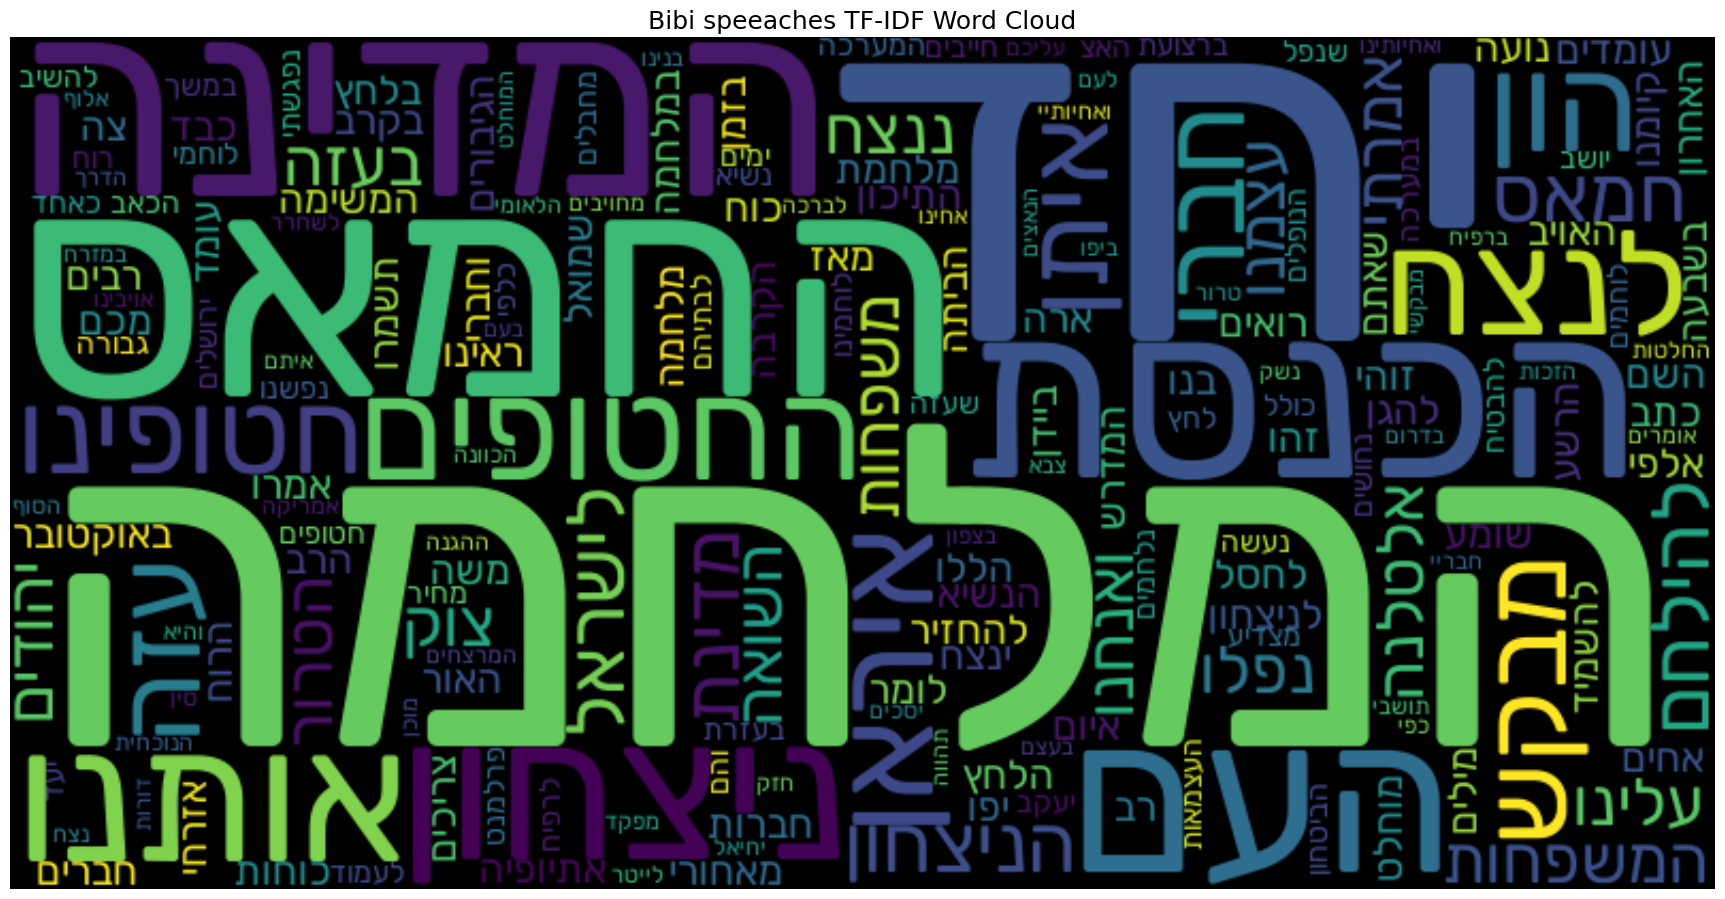

In [43]:
# make a wordcloud
import matplotlib.pyplot as plt

# Create dictionary of word: tfidf_score
word_scores = dict(zip(tfidf_df['word'], tfidf_df['tfidf']))
reverse_hebrew_scores = reverse_hebrew_words(word_scores)

# Create the word cloud
wordcloud = WordCloud(
    font_path='Rubik-Regular.ttf',
    width=800,
    height=400,
).generate_from_frequencies(reverse_hebrew_scores)

# Display the word cloud
plt.figure(figsize=(22, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Bibi speeaches TF-IDF Word Cloud", fontsize=18)
plt.show()